<h1 align="center">Volume 4: Spectral 1.</h1>

    NAME
    Section #
    DATE

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from numpy import linalg as la
from scipy.optimize import root
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Setup

def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

Use the differentiation matrix to numerically approximate the derivative of u(x)) on a grid of N Chebychev points where N = 6, 8, and 10.
Then use barycentric interpolation (scipy.interpolate.barycentric_interpolate) to
approximate u0 on a grid of 100 evenly spaced points.
Graphically compare your approximation to the exact derivative

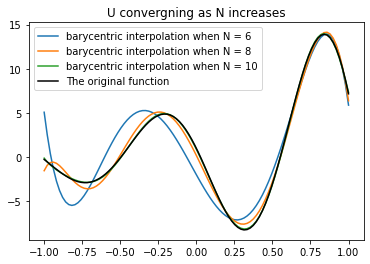

In [2]:
def cheb(N):
    x =  np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D  = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

#ufunction
u = lambda x: np.exp(x)*np.cos(6*x)

#getting Ds and Xs
D_6,x_6 = cheb(6)
D_8,x_8 = cheb(8)
D_10,x_10 = cheb(10)

#getting Us
U_6 = u(x_6)
U_8 = u(x_8)
U_10 = u(x_10)

#getting the derivatives
d_u_6 = D_6@U_6
d_u_8 = D_8@U_8
d_u_10 = D_10@U_10

#barycentric when N = 6
x = np.linspace(-1,1,100)
y = barycentric_interpolate(x_6, d_u_6, x)
plt.plot(x, y, label="barycentric interpolation when N = 6")

#barycentric when N = 8
y = barycentric_interpolate(x_8, d_u_8, x)
plt.plot(x, y, label="barycentric interpolation when N = 8")

#barycentric when N = 10
y = barycentric_interpolate(x_10, d_u_10, x)
plt.plot(x, y, label="barycentric interpolation when N = 10")

#plotting the original things
y = lambda x: np.exp(x)*(np.cos(6*x)-6*np.sin(6*x))
plt.plot(x, y(x), color = 'black', label= "The original function")

plt.title("U convergning as N increases")
plt.legend()
plt.show()

# Problem 2

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points. Compare your numerical solution with the exact solution.

[ 1.62540932e-16 -1.91849576e-01 -5.53380961e-01 -7.50088294e-01
 -6.90549264e-01 -4.77272907e-01 -2.38625473e-01 -6.34552821e-02
  0.00000000e+00]


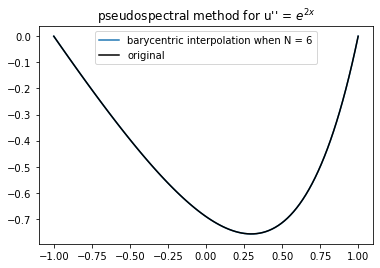

In [3]:
#The following code will force U[0] = U[N] = 0
D, x = cheb(8)    #for some N
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1

#setting F
f = lambda x: np.exp(2*x)
F = f(x).T

F[0], F[-1] = 0, 0

U = la.solve(D2, F)
print(U)

u_x = x
#barycentric when N = 6
x = np.linspace(-1,1,100)
y = barycentric_interpolate(u_x, U, x)
plt.plot(x, y, label="barycentric interpolation when N = 6")
u = lambda x: (-np.cosh(2)-np.sinh(2)*x + np.exp(2*x))/4
plt.plot(x, u(x), color = 'black', label = 'original')

plt.title(r"pseudospectral method for u'' = $e^{2x}$")
plt.legend()
plt.show()



# Problem 3

Use the pseudospectral method to solve the boundary value problem.
Use N = 8 in the cheb(N) method and use barycentric interpolation to approximate u on
100 evenly spaced points.

[-1.         -1.2839379  -1.72991215 -1.78698961 -1.3346196  -0.46524356
  0.63464867  1.60523688  2.        ]


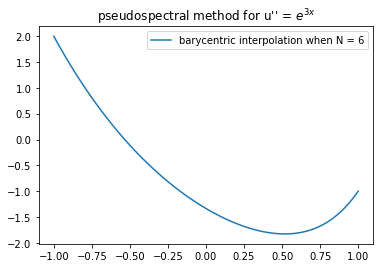

In [4]:
#The following code will force U[0] = U[N] = 0
D, x = cheb(8)    #for some N
D2 = np.dot(D, D)
D_new = D2+D
D_new[0,:], D_new[-1,:] = 0, 0
D_new[0,0], D_new[-1,-1] = 1, 1

#setting F
f = lambda x: np.exp(3*x)
F = f(x).T

F[0], F[-1] = -1, 2

U = la.solve(D_new, F)
print(U)

u_x = x
#barycentric when N = 6
x = np.linspace(-1,1,100)
y = barycentric_interpolate(u_x, U, x)
plt.plot(x, y, label="barycentric interpolation when N = 6")
u = lambda x: (-np.cosh(2)-np.sinh(2)*x + np.exp(2*x))/4
# plt.plot(x, u(x), color = 'black', label = 'original')

plt.title(r"pseudospectral method for u'' = $e^{3x}$")
plt.legend()
plt.show()

# Problem 4

Use the pseudospectral method to solve the boundary value problem
for several values of λ: λ = 4, 8, 12. Begin by transforming this BVP onto the domain −1 <
x < 1. Use N = 20 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points

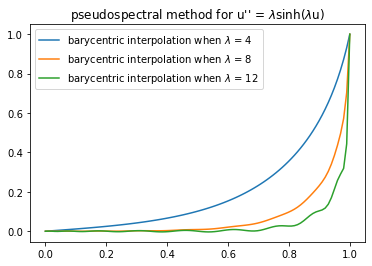

In [5]:
#The following code will force U[0] = U[N] = 0
D, x = cheb(20)    #for some N
x = (x+1)/2
#getting and changing D
D2 = np.dot(D, D)
D2[0,:], D2[-1,:] = 0, 0
D2[0,0], D2[-1,-1] = 1, 1

#setting F
for lamb in [4,8,12]:
    def F(U):
        f = 4*D2@U-lamb*np.sinh(lamb*U)
        f[-1] = U[0]-1
        f[0] = U[-1]
        
        return f
    
    guess = np.ones(len(x))
    solution = root(F, guess).x

    #getting barycentric values
    x_vals = np.linspace(0,1,100)
    y = barycentric_interpolate(x, solution, x_vals)
    plt.plot(x_vals, y, label=r"barycentric interpolation when $\lambda$ = "+str(lamb))

plt.title(r"pseudospectral method for u'' = $\lambda$sinh($\lambda$u)")
plt.legend()
plt.show()

# Problem 5

Find the function y(x) that satisies y(−1) = 1, y(1) = 7, and whose surface of
revolution (about the x-axis) minimizes surface area. Compute the surface area, and plot the
surface. Use N = 50 in the cheb(N) method and use barycentric interpolation to approximate
u on 100 evenly spaced points.
Below is sample code for creating the 3D wireframe figure.

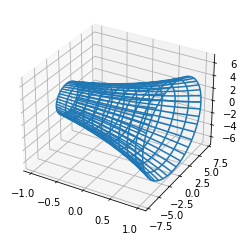

In [6]:
#The following code will force U[0] = U[N] = 0
D, x = cheb(50)    #for some N
#getting and changing D
D2 = np.dot(D, D)

#setting F
def F(U):
    f = U*(D2@U)-(D@U)*(D@U) - np.ones(len(U))
    f[-1] = U[0]-7
    f[0] = U[-1]-1

    return f
    
    guess = 2*np.ones(len(x))
    solution = root(F, guess).x

#getting barycentric values
x_vals = np.linspace(0,1,100)
guess = 2*np.ones(len(x))
solution = root(F, guess).x
barycentric = barycentric_interpolate(x, solution, x_vals)

#plugging in it intpa dr
lin = np.linspace(-1,1,100)
theta = np.linspace(0,2*np.pi, 401)
X,T = np.meshgrid(lin, theta)
Y,Z = barycentric*np.cos(T), barycentric*np.sin(T)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z, rstride=10, cstride = 10)
plt.show()